Prepare the environment
-----------------------

First we'll import various functions that we'll need for generating the report. 

In [1]:
%matplotlib inline
from os.path import join, exists, expandvars
import pandas as pd
from skbio.draw import boxplots

from taxcompare.eval_framework import (get_expected_tables_lookup, 
                                       find_and_process_result_tables,
                                       compute_mock_results,
                                       compute_mantel,
                                       generate_pr_scatter_plots,
                                       boxplot_from_data_frame,
                                       heatmap_from_data_frame,
                                       method_by_dataset_a1,
                                       method_by_dataset_a2)

/usr/local/lib/python2.7/dist-packages/matplotlib/__init__.py:1312: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


Configure local environment-specific values
-------------------------------------------

**This is the only cell that you will need to edit to generate reports locally.** After editing this cell, you can run all cells in this notebook to generate your analysis report. Some of the analyses make take a few minutes to run, and analyses at more specific taxonomic levels (e.g., genus or species) will be slower than analyses at more general taxonomic levels (e.g., phylum, class). 

In [2]:
## project_dir should be the directory where you've downloaded (or cloned) the 
## short-read-tax-assignment repository. 
project_dir = expandvars("$HOME/data/short-read-tax-assignment")

precomputed_results_dir = expandvars("$HOME/data/short-read-tax-assignment/data/precomputed-results/")
expected_results_dir = join(precomputed_results_dir, "mock-community")

## results_dirs should contain the directory or directories where
## results can be found. By default, this is just the precomputed 
## results included with the project. If other results should be included, 
## absolute paths to those directories should be added to this list.
results_dirs = \
 [precomputed_results_dir,
  ]

## Taxonomic level at which analyses should be performed. Edit this to
## the desired taxonomic level. 
# 2: phylum, 3: class, 4: order, 5: family, 6: genus, 7: species
taxonomic_level = 4

## Minimum number of times an OTU must be observed for it to be included in analyses. Edit this
## to analyze the effect of the minimum count on taxonomic results.
min_count = 10

In [3]:
# Define the subdirectories where the query mock community data should be, and confirm that they exist.
mock_results_dirs = [join(results_dir,"mock-community") for results_dir in results_dirs]

for mock_results_dir in mock_results_dirs:
    assert exists(mock_results_dir), "Mock community result directory doesn't exist: %s" % mock_results_dir


Find mock community pre-computed tables, expected tables, and "query" tables
----------------------------------------------------------------------------

Next we'll use the paths defined above to find all of the tables that will be compared. These include the *pre-computed result* tables (i.e., the ones that the new methods will be compared to), the *expected result* tables (i.e., the tables containing the known composition of the mock microbial communities), and the *query result* tables (i.e., the tables generated with the new method(s) that we want to compare to the *pre-computed result* tables).

In [4]:
results = []
for mock_results_dir in mock_results_dirs:
    results += find_and_process_result_tables(mock_results_dir)

In [5]:
expected_tables = get_expected_tables_lookup(expected_results_dir, level=taxonomic_level)

In [6]:
# Uncomment for test runs (looks at a small subset of the data)

# from random import shuffle
# shuffle(results)
# results = results[:10]

Evalution 1: Compute and summarize precision, recall, and F-measure for mock communities
----------------------------------------------------------------------------------------

In this evaluation, we compute and summarize precision, recall, and F-measure of each result (pre-computed and query) based on the known composition of the mock communities. We then summarize the results in two ways: first with boxplots, and second with a table of the top methods based on their F-measures. 

This is a qualitative evaluation, effectively telling us about the ability of the different methods to report the taxa that are present in each sample. These metrics are not concerned with the abundance of the different taxa.

In [7]:
mock_results = compute_mock_results(results, expected_tables, taxonomy_level=taxonomic_level, min_count=min_count)

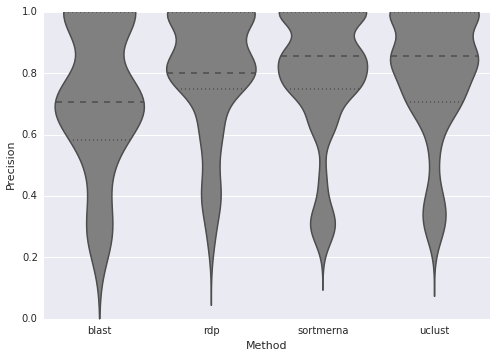

In [8]:
boxplot_from_data_frame(mock_results, group_by="Method", metric="Precision")

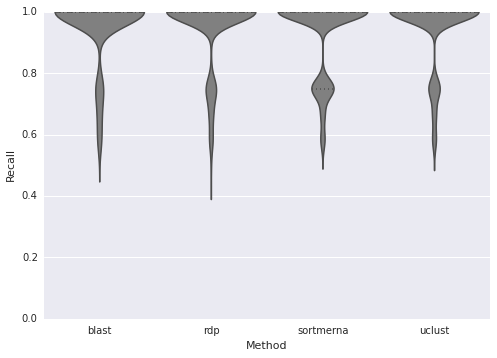

In [9]:
boxplot_from_data_frame(mock_results, group_by="Method", metric="Recall")

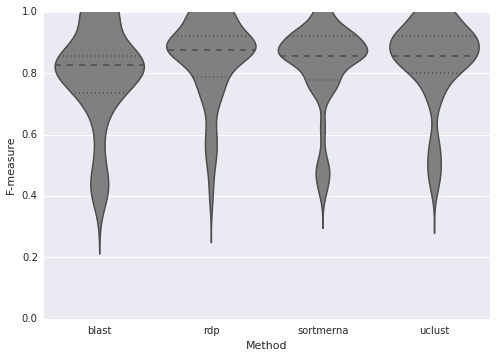

In [10]:
boxplot_from_data_frame(mock_results, group_by="Method", metric="F-measure")

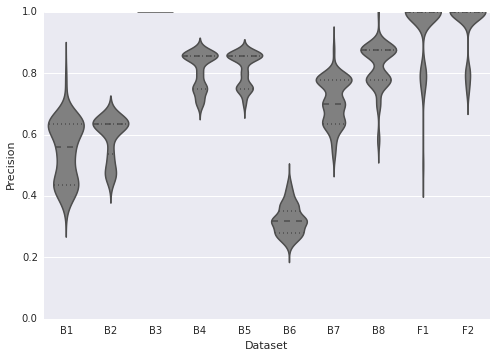

In [11]:
boxplot_from_data_frame(mock_results, group_by="Dataset", metric="Precision")

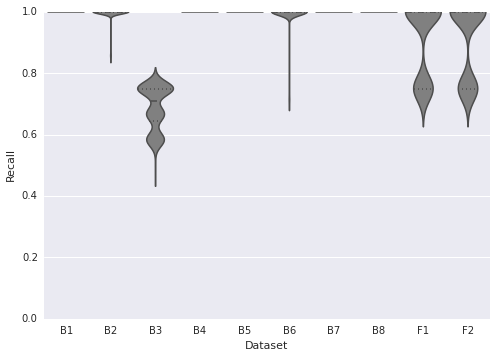

In [12]:
boxplot_from_data_frame(mock_results, group_by="Dataset", metric="Recall")

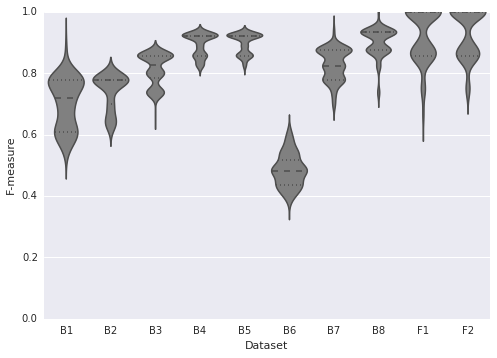

In [13]:
boxplot_from_data_frame(mock_results, group_by="Dataset", metric="F-measure")

/usr/local/lib/python2.7/dist-packages/matplotlib/figure.py:387: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


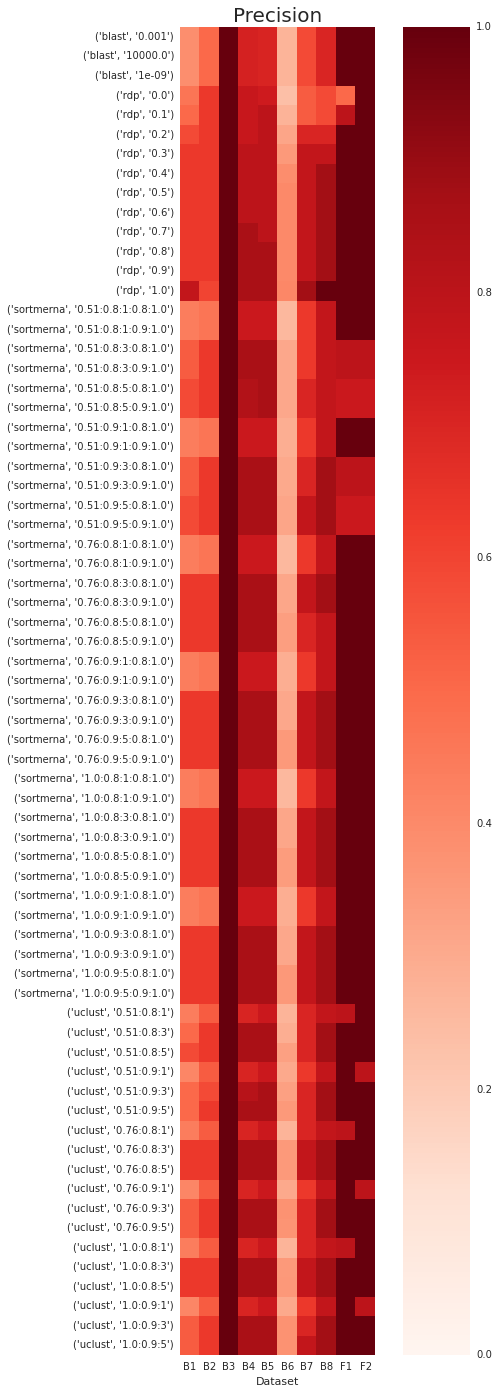

In [14]:
heatmap_from_data_frame(mock_results, "Precision")

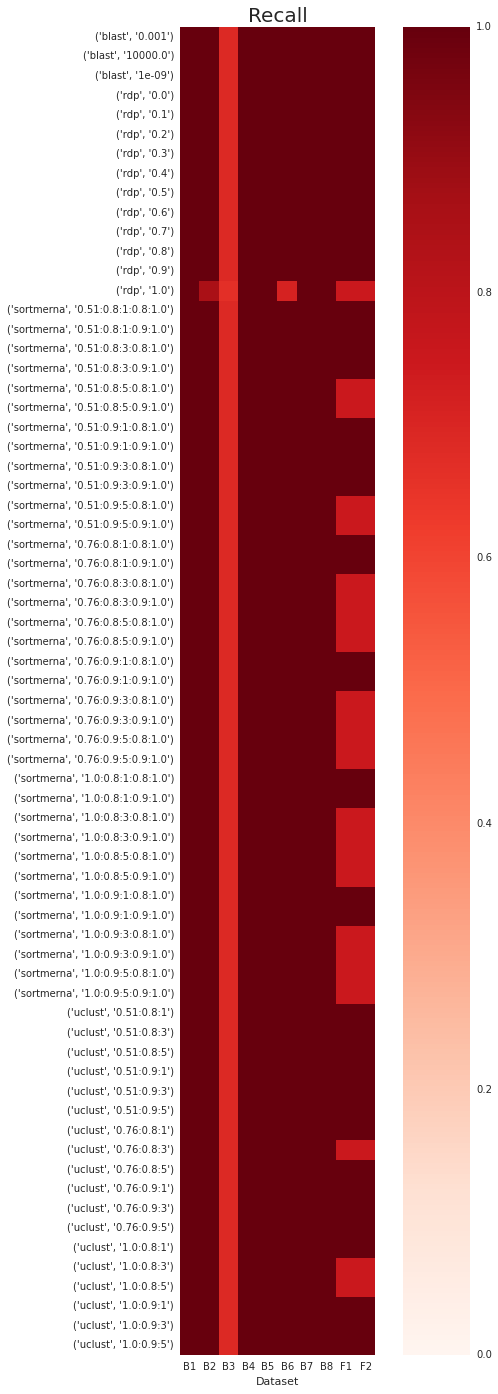

In [15]:
heatmap_from_data_frame(mock_results, "Recall")

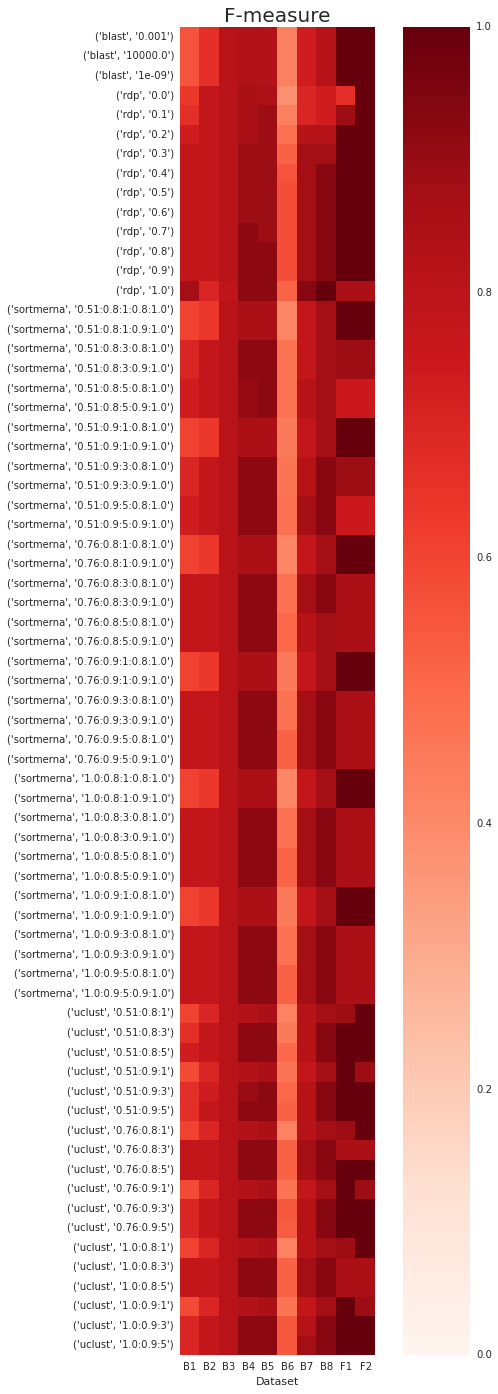

In [16]:
heatmap_from_data_frame(mock_results, "F-measure")

In [17]:
method_by_dataset_a1(mock_results, 'B1')

Method  Precision  Recall  F-measure
1944        rdp   0.777778       1   0.875000
1904  sortmerna   0.636364       1   0.777778
1961     uclust   0.636364       1   0.777778
1942      blast   0.388889       1   0.560000

In [18]:
method_by_dataset_a1(mock_results, 'B2')

Method  Precision  Recall  F-measure
0   sortmerna   0.636364       1   0.777778
39        rdp   0.636364       1   0.777778
50     uclust   0.636364       1   0.777778
36      blast   0.500000       1   0.666667

In [19]:
method_by_dataset_a1(mock_results, 'B3')

Method  Precision  Recall  F-measure
680  sortmerna          1    0.75   0.857143
824      blast          1    0.75   0.857143
836        rdp          1    0.75   0.857143
909     uclust          1    0.75   0.857143

In [20]:
method_by_dataset_a1(mock_results, 'B4')

Method  Precision  Recall  F-measure
1428  sortmerna   0.857143       1   0.923077
1589        rdp   0.857143       1   0.923077
1688     uclust   0.857143       1   0.923077
1583      blast   0.750000       1   0.857143

In [21]:
method_by_dataset_a1(mock_results, 'B5')

Method  Precision  Recall  F-measure
952   sortmerna   0.857143       1   0.923077
1112        rdp   0.857143       1   0.923077
1152     uclust   0.857143       1   0.923077
1097      blast   0.705882       1   0.827586

In [22]:
method_by_dataset_a1(mock_results, 'B6')

Method  Precision  Recall  F-measure
619        rdp   0.437500       1   0.608696
651     uclust   0.411765       1   0.583333
528  sortmerna   0.388889       1   0.560000
589      blast   0.280000       1   0.437500

In [23]:
method_by_dataset_a1(mock_results, 'B7')

Method  Precision  Recall  F-measure
190        rdp   0.875000       1   0.933333
68   sortmerna   0.777778       1   0.875000
239     uclust   0.777778       1   0.875000
184      blast   0.583333       1   0.736842

In [24]:
method_by_dataset_a1(mock_results, 'B8')

Method  Precision  Recall  F-measure
392        rdp      1.000       1   1.000000
272  sortmerna      0.875       1   0.933333
463     uclust      0.875       1   0.933333
387      blast      0.700       1   0.823529

In [25]:
method_by_dataset_a1(mock_results, 'F1')

Method  Precision  Recall  F-measure
1769  sortmerna          1       1          1
1864     uclust          1       1          1
1849        rdp          1       1          1
1816      blast          1       1          1

In [26]:
method_by_dataset_a1(mock_results, 'F2')

Method  Precision  Recall  F-measure
1294  sortmerna          1       1          1
1332      blast          1       1          1
1370        rdp          1       1          1
1374     uclust          1       1          1

Evaluation 2: Compute and summarize correlations between observed and known mock community structure
----------------------------------------------------------------------------------------------------

In this evaluation, we compute and summarize the correlation between each result (pre-computed and query) and the known composition of the mock communities. We then summarize the results in two ways: first with a series of boxplots of correlation coefficients by method; and second with a table of the top methods based on their Pearson correlation coefficient. 

This is a quantitative evaluation, which tells us about the ability of the different methods to report the taxa that are present in each sample and accurately assess their abundance. Because many factors can affect the observed abundance of taxa beyond the accuracy of the taxonomic assigner (e.g., primer bias), the correlation coefficients are frequently low, but we expect that their relative values are informative in understanding which taxonomic assigners are more correct than others.

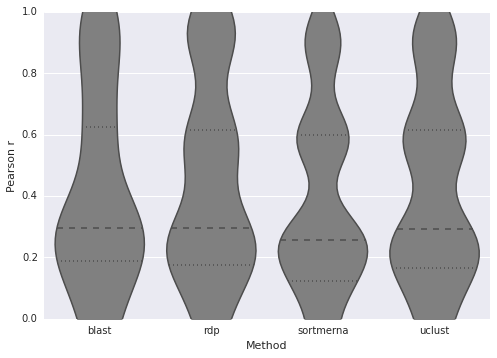

In [27]:
boxplot_from_data_frame(mock_results, group_by="Method", metric="Pearson r")

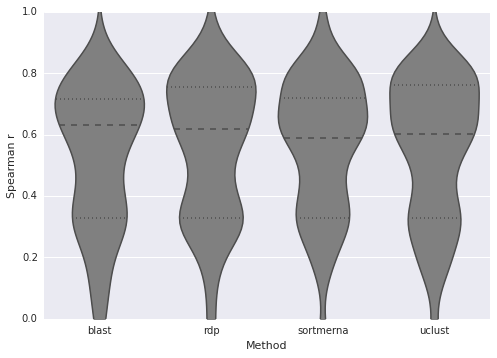

In [28]:
boxplot_from_data_frame(mock_results, group_by="Method", metric="Spearman r")

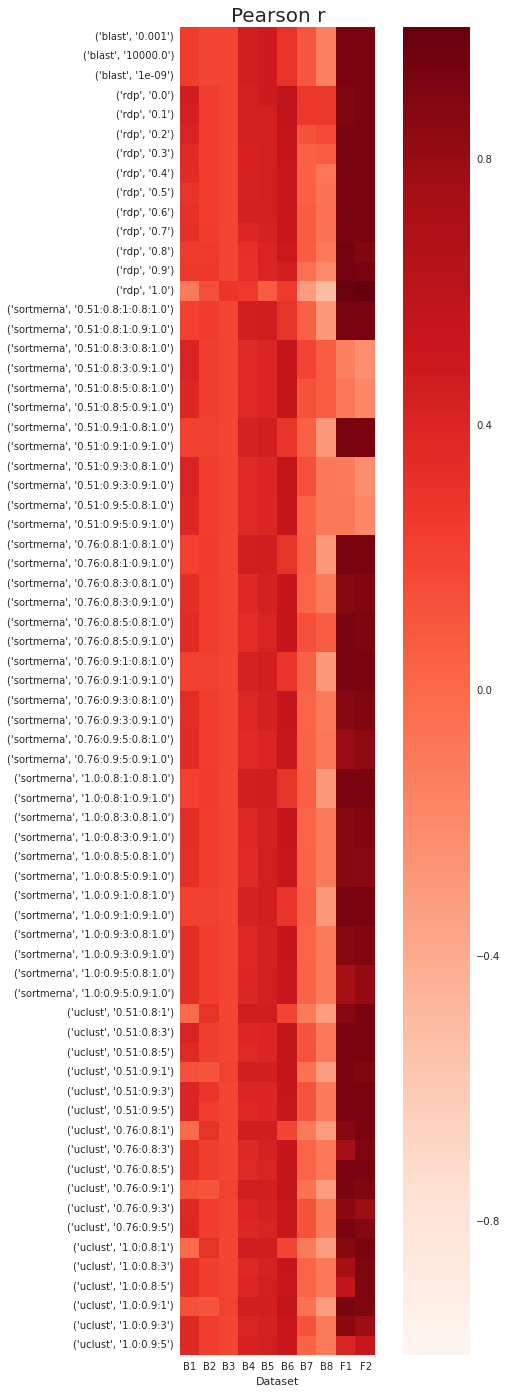

In [29]:
heatmap_from_data_frame(mock_results, "Pearson r", vmin=-1, vmax=1)

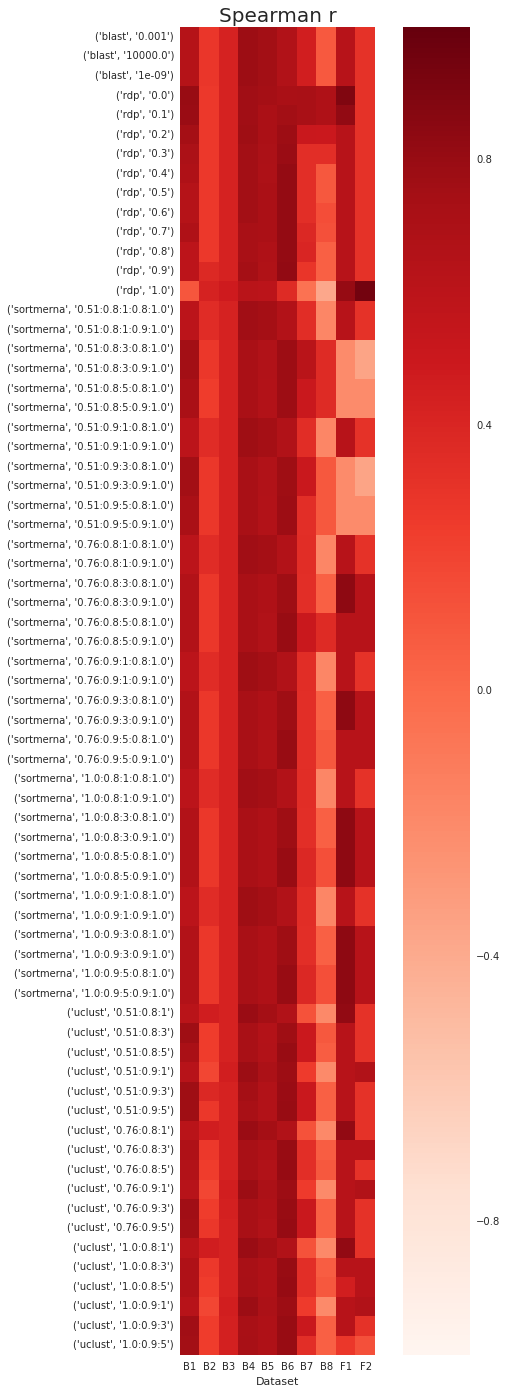

In [30]:
heatmap_from_data_frame(mock_results, "Spearman r", vmin=-1, vmax=1)

In [31]:
method_by_dataset_a2(mock_results, 'B1')

Method  Pearson r  Spearman r
1950        rdp   0.462151    0.799423
1967     uclust   0.417858    0.771336
1906  sortmerna   0.410498    0.750114
1941      blast   0.248716    0.643795

In [32]:
method_by_dataset_a2(mock_results, 'B2')

Method  Pearson r  Spearman r
62     uclust   0.312263    0.465187
43        rdp   0.264931    0.375790
32  sortmerna   0.248337    0.354319
38      blast   0.187618    0.285418

In [33]:
method_by_dataset_a2(mock_results, 'B3')

Method  Pearson r  Spearman r
841        rdp   0.405463    0.520834
889     uclust   0.288642    0.457830
729  sortmerna   0.256416    0.327621
833      blast   0.256416    0.327621

In [34]:
method_by_dataset_a2(mock_results, 'B4')

Method  Pearson r  Spearman r
1469  sortmerna   0.642974    0.783103
1617        rdp   0.639395    0.771603
1689     uclust   0.627433    0.782332
1577      blast   0.626847    0.791618

In [35]:
method_by_dataset_a2(mock_results, 'B5')

Method  Pearson r  Spearman r
1138        rdp   0.628979    0.758791
1086  sortmerna   0.627980    0.802222
1214     uclust   0.624942    0.802222
1106      blast   0.616563    0.793621

In [36]:
method_by_dataset_a2(mock_results, 'B6')

Method  Pearson r  Spearman r
615        rdp   0.614975    0.726004
666     uclust   0.593109    0.797678
564  sortmerna   0.578997    0.806661
584      blast   0.315388    0.657760

In [37]:
method_by_dataset_a2(mock_results, 'B7')

Method  Pearson r  Spearman r
206        rdp   0.355495    0.754209
140  sortmerna   0.290469    0.660644
242     uclust   0.224443    0.570595
176      blast   0.188917    0.493077

In [38]:
method_by_dataset_a2(mock_results, 'B8')

Method  Pearson r  Spearman r
399        rdp   0.390994    0.719121
339  sortmerna   0.216886    0.426782
471     uclust   0.065845    0.190476
387      blast  -0.048733    0.141115

In [39]:
method_by_dataset_a2(mock_results, 'F1')

Method  Pearson r  Spearman r
1822        rdp   0.980565    0.948683
1900     uclust   0.974353    0.632456
1711  sortmerna   0.974000    0.632456
1810      blast   0.973436    0.632456

In [40]:
method_by_dataset_a2(mock_results, 'F2')

Method  Pearson r  Spearman r
1344        rdp   0.999982    0.948683
1411     uclust   0.943157    0.316228
1270  sortmerna   0.942940    0.316228
1333      blast   0.941040    0.316228